## Exploratory Analysis notebook

The idea behind this notebook is to perform an exploratory analysis on marketplace's publication with discount.

### Import libraries

In [2]:
import pandas as pd
import requests
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Obtaining the data

To list all categories available:

In [3]:
r =requests.get("https://api.mercadolibre.com/sites/MLA/categories/all")

In [4]:
categories = r.json()

In [5]:
print(len(categories))

9854


That is a lot of categories....

In [6]:
r =requests.get("https://api.mercadolibre.com/sites/MLA/categories")

In [7]:
categories = r.json()

In [8]:
print(categories)

[{'id': 'MLA5725', 'name': 'Accesorios para Vehículos'}, {'id': 'MLA1512', 'name': 'Agro'}, {'id': 'MLA1403', 'name': 'Alimentos y Bebidas'}, {'id': 'MLA1071', 'name': 'Animales y Mascotas'}, {'id': 'MLA1367', 'name': 'Antigüedades y Colecciones'}, {'id': 'MLA1368', 'name': 'Arte, Librería y Mercería'}, {'id': 'MLA1743', 'name': 'Autos, Motos y Otros'}, {'id': 'MLA1384', 'name': 'Bebés'}, {'id': 'MLA1246', 'name': 'Belleza y Cuidado Personal'}, {'id': 'MLA1039', 'name': 'Cámaras y Accesorios'}, {'id': 'MLA1051', 'name': 'Celulares y Teléfonos'}, {'id': 'MLA1648', 'name': 'Computación'}, {'id': 'MLA1144', 'name': 'Consolas y Videojuegos'}, {'id': 'MLA1500', 'name': 'Construcción'}, {'id': 'MLA1276', 'name': 'Deportes y Fitness'}, {'id': 'MLA5726', 'name': 'Electrodomésticos y Aires Ac.'}, {'id': 'MLA1000', 'name': 'Electrónica, Audio y Video'}, {'id': 'MLA2547', 'name': 'Entradas para Eventos'}, {'id': 'MLA407134', 'name': 'Herramientas'}, {'id': 'MLA1574', 'name': 'Hogar, Muebles y Jar

In [9]:
print(len(categories))

32


In [10]:
for item in categories:
    print(item["name"], item["id"])

Accesorios para Vehículos MLA5725
Agro MLA1512
Alimentos y Bebidas MLA1403
Animales y Mascotas MLA1071
Antigüedades y Colecciones MLA1367
Arte, Librería y Mercería MLA1368
Autos, Motos y Otros MLA1743
Bebés MLA1384
Belleza y Cuidado Personal MLA1246
Cámaras y Accesorios MLA1039
Celulares y Teléfonos MLA1051
Computación MLA1648
Consolas y Videojuegos MLA1144
Construcción MLA1500
Deportes y Fitness MLA1276
Electrodomésticos y Aires Ac. MLA5726
Electrónica, Audio y Video MLA1000
Entradas para Eventos MLA2547
Herramientas MLA407134
Hogar, Muebles y Jardín MLA1574
Industrias y Oficinas MLA1499
Inmuebles MLA1459
Instrumentos Musicales MLA1182
Joyas y Relojes MLA3937
Juegos y Juguetes MLA1132
Libros, Revistas y Comics MLA3025
Música, Películas y Series MLA1168
Ropa y Accesorios MLA1430
Salud y Equipamiento Médico MLA409431
Servicios MLA1540
Souvenirs, Cotillón y Fiestas MLA9304
Otras categorías MLA1953


Guessing these are the main categories...

Now I want to obtain products within a category, to do a search by category I use the following request:

In [11]:
r =requests.get("https://api.mercadolibre.com/sites/MLA/search?category=MLA5725")

In [12]:
print(r.text)

{"site_id":"MLA","country_default_time_zone":"GMT-03:00","paging":{"total":45381,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA924324772","site_id":"MLA","title":"Cubierta Trasera Para Moto Rinaldi R 34 Para Uso Con Cámara 120/80-18 S 62","seller":{"id":89575112,"permalink":"http://perfil.mercadolibre.com.ar/FASMOTOS00","registration_date":"2005-11-28T19:39:43.000-04:00","car_dealer":false,"real_estate_agency":false,"tags":["normal","eshop","credits_profile","mshops","messages_as_seller"],"eshop":{"seller":89575112,"eshop_rubro":null,"eshop_id":37897,"nick_name":"FASMOTOS00","site_id":"MLA","eshop_logo_url":"http://resources.mlstatic.com/eshops/89575112vcf107e.png","eshop_status_id":1,"eshop_experience":0,"eshop_locations":[]},"seller_reputation":{"power_seller_status":"platinum","level_id":"5_green","metrics":{"cancellations":{"period":"60 days","rate":0.0064,"value":234},"claims":{"period":"60 days","rate":0.0188,"value":682},"delayed_handling_time":{"period":"60

In [13]:
resultado=r.json()

In [14]:
print(resultado.keys())

dict_keys(['site_id', 'country_default_time_zone', 'paging', 'results', 'sort', 'available_sorts', 'filters', 'available_filters'])


In [15]:
print(resultado["results"][0].keys())

dict_keys(['id', 'site_id', 'title', 'seller', 'price', 'prices', 'sale_price', 'currency_id', 'available_quantity', 'sold_quantity', 'buying_mode', 'listing_type_id', 'stop_time', 'condition', 'permalink', 'thumbnail', 'thumbnail_id', 'accepts_mercadopago', 'installments', 'address', 'shipping', 'seller_address', 'attributes', 'original_price', 'category_id', 'official_store_id', 'domain_id', 'catalog_product_id', 'tags', 'catalog_listing', 'use_thumbnail_id', 'offer_score', 'offer_share', 'match_score', 'winner_item_id', 'melicoin', 'discounts', 'order_backend'])


In [16]:
products = pd.DataFrame(resultado["results"])

In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49 non-null     object 
 1   site_id               49 non-null     object 
 2   title                 49 non-null     object 
 3   seller                49 non-null     object 
 4   price                 49 non-null     float64
 5   prices                49 non-null     object 
 6   sale_price            0 non-null      object 
 7   currency_id           49 non-null     object 
 8   available_quantity    49 non-null     int64  
 9   sold_quantity         49 non-null     int64  
 10  buying_mode           49 non-null     object 
 11  listing_type_id       49 non-null     object 
 12  stop_time             49 non-null     object 
 13  condition             49 non-null     object 
 14  permalink             49 non-null     object 
 15  thumbnail             49 

In [18]:
products.head()

,id,site_id,title,seller,price,prices,sale_price,currency_id,available_quantity,sold_quantity,...,catalog_listing,use_thumbnail_id,offer_score,offer_share,match_score,winner_item_id,melicoin,discounts,order_backend,differential_pricing
0,MLA924324772,MLA,Cubierta Trasera Para Moto Rinaldi R 34 Para U...,"{'id': 89575112, 'permalink': 'http://perfil.m...",14121.75,"{'id': 'MLA924324772', 'prices': [{'id': '75',...",None,ARS,47,318,...,True,True,None,None,None,None,None,None,1,NaN
1,MLA610309020,MLA,Sensor De Estacionamiento * Colores Con Displa...,"{'id': 149089767, 'permalink': 'http://perfil....",1890.00,"{'id': 'MLA610309020', 'prices': [{'id': '5', ...",None,ARS,100,5000,...,NaN,False,None,None,None,None,None,None,2,NaN
2,MLA921839305,MLA,Casco Para Moto Integral Halcon H57 Negro Tal...,"{'id': 349875216, 'permalink': 'http://perfil....",3474.00,"{'id': 'MLA921839305', 'prices': [{'id': '134'...",None,ARS,13,227,...,True,True,None,None,None,None,None,None,3,NaN
3,MLA636709517,MLA,Cubre Alfombra Goma Pesada Universal 3 Piezas ...,"{'id': 173563910, 'permalink': 'http://perfil....",2239.99,"{'id': 'MLA636709517', 'prices': [{'id': '81',...",None,ARS,1,5000,...,NaN,False,None,None,None,None,None,None,4,NaN
4,MLA634474528,MLA,Aceite Motul 8100 X-cess 5w40 X 5 Lts.,"{'id': 227689438, 'permalink': 'http://perfil....",7810.00,"{'id': 'MLA634474528', 'prices': [{'id': '76',...",None,ARS,1,5000,...,NaN,True,None,None,None,None,None,None,5,NaN


In [19]:
products[["original_price", "price"]].head()

,original_price,price
0,14865.0,14121.75
1,NaN,1890.00
2,NaN,3474.00
3,NaN,2239.99
4,NaN,7810.00


There are two parameter to obtain and paginate the response `limit` and `offset`. Limit is the number of elements to get (50 by default) and offset moves the lower limit of the responses to follow the default ones. i.e with limit=50, offset=0 I would get the first 50 responses, with values limit=50, offset=50 I would get the following 50 responses to the first ones.

In [20]:
r =requests.get("https://api.mercadolibre.com/sites/MLA/search?category=MLA5725&limit=50&offset=50")

In [21]:
resultado=r.json()
products = pd.DataFrame(resultado["results"])
products[["id","category_id"]].head()

,id,category_id
0,MLA931486366,MLA72278
1,MLA1128240442,MLA4712
2,MLA1130615192,MLA86840
3,MLA839021911,MLA373345
4,MLA1131283382,MLA370796


After a preliminar analysis of the downloaded data I discovered that the `category_id` of the results is not the category_id I expected. After reviewing the documentation I assume that the category within "results" is not the main category but a children category. Due to this issue I am going to add two new columns to later sort data with the main categories.

To perform an exploratory analysis I am going to select the main categories (31 + "others") and make a request to get 500 data from each category. These data is going to be saved as dataframe for posterior analysis.

In [22]:
url_base="https://api.mercadolibre.com/sites/MLA/search?category="

In [24]:
productsList = []
for category in categories:
    for offset in range(0,500,50):
        url = url_base + category["id"] + "&offset=" + str(offset)
        r = requests.get(url)
        result = r.json()
        products= pd.DataFrame(result["results"])
        products["parent_category_name"] = category["name"]
        products["parent_category_id"] = category["id"]
        productsList.append(products)
        
productsDF = pd.concat(productsList)    
        

In [25]:
productsDF.head()

,id,site_id,title,seller,price,prices,sale_price,currency_id,available_quantity,sold_quantity,...,match_score,winner_item_id,melicoin,discounts,catalog_listing,parent_category_name,parent_category_id,seller_contact,location,sale_terms
0,MLA791472818,MLA,Conjunto Termico Alpina + Guantes + Mascara + ...,"{'id': 19876329, 'permalink': 'http://perfil.m...",4008.05,"{'id': 'MLA791472818', 'prices': [{'id': '101'...",None,ARS,5000,500,...,None,None,None,None,NaN,Accesorios para Vehículos,MLA5725,NaN,NaN,NaN
1,MLA636709517,MLA,Cubre Alfombra Goma Pesada Universal 3 Piezas ...,"{'id': 173563910, 'permalink': 'http://perfil....",2239.99,"{'id': 'MLA636709517', 'prices': [{'id': '81',...",None,ARS,1,5000,...,None,None,None,None,NaN,Accesorios para Vehículos,MLA5725,NaN,NaN,NaN
2,MLA924324772,MLA,Cubierta Trasera Para Moto Rinaldi R 34 Para U...,"{'id': 89575112, 'permalink': 'http://perfil.m...",14121.75,"{'id': 'MLA924324772', 'prices': [{'id': '75',...",None,ARS,47,318,...,None,None,None,None,True,Accesorios para Vehículos,MLA5725,NaN,NaN,NaN
3,MLA858342259,MLA,Alfombra Volkswagen Amarok Termoformadas Ziel ...,"{'id': 220004426, 'permalink': 'http://perfil....",28892.00,"{'id': 'MLA858342259', 'prices': [{'id': '31',...",None,ARS,1,500,...,None,None,None,None,NaN,Accesorios para Vehículos,MLA5725,NaN,NaN,NaN
4,MLA1102761474,MLA,Compresor De Aire Mini A Batería Portátil Klat...,"{'id': 671347056, 'permalink': 'http://perfil....",1799.00,"{'id': 'MLA1102761474', 'prices': [{'id': '48'...",None,ARS,442,3889,...,None,None,None,None,True,Accesorios para Vehículos,MLA5725,NaN,NaN,NaN


In [26]:
productsDF.shape

(15940, 44)

Save data to csv

In [27]:
#Uncomment to save to file
productsDF.to_csv("productosCat.csv")

Load csv

In [35]:
#Uncomment to load csv file
#productsDF = pd.read_csv("productosCatV2.csv", index_col=[0])

### Exploratory analysis

Once the data is obtained and saved as a dataframe we can start with the analysis.

We can use describe function to obtain basic information, such as mean, standard deviation, etc.:

In [36]:
productsDF.describe()

,price,sale_price,available_quantity,sold_quantity,original_price,official_store_id,order_backend,offer_score,offer_share,match_score,winner_item_id,melicoin,discounts
count,1.589200e+04,0.0,15968.000000,15968.000000,2937.000000,2434.000000,15968.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.674601e+05,NaN,460.463364,518.823960,18899.963841,1614.646672,25.501315,NaN,NaN,NaN,NaN,NaN,NaN
std,9.970208e+05,NaN,3582.244319,2044.311481,37045.561847,841.726402,14.433517,NaN,NaN,NaN,NaN,NaN,NaN
min,3.700000e+01,NaN,1.000000,0.000000,50.270000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.773000e+03,NaN,1.000000,12.000000,2199.000000,997.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000e+03,NaN,8.000000,107.000000,6499.000000,1666.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.650000e+04,NaN,100.000000,500.000000,17999.950000,2293.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1.350000e+07,NaN,99985.000000,50000.000000,635849.000000,2843.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN


Let's analyze products by category:

In [37]:
productsDF.loc[productsDF.category_id=="MLA69570"].groupby("parent_category_name").head()

,id,site_id,title,seller,price,prices,sale_price,currency_id,available_quantity,sold_quantity,...,winner_item_id,melicoin,discounts,catalog_listing,differential_pricing,parent_category_name,parent_category_id,seller_contact,location,sale_terms
27,MLA896327580,MLA,Mascarillas Descartables Pack X 50 Triple Filtro,"{'id': 531469359, 'permalink': 'http://perfil....",699.0,"{'id': 'MLA896327580', 'prices': [{'id': '227'...",NaN,ARS,500,50000,...,NaN,NaN,NaN,NaN,NaN,Industrias y Oficinas,MLA1499,NaN,NaN,NaN
28,MLA930974431,MLA,Combo Barbijos Gris / Black Ion Positivo Nanop...,"{'id': 735842307, 'permalink': 'http://perfil....",2730.0,"{'id': 'MLA930974431', 'prices': [{'id': '1', ...",NaN,ARS,500,5000,...,NaN,NaN,NaN,NaN,NaN,Industrias y Oficinas,MLA1499,NaN,NaN,NaN
32,MLA930325833,MLA,Barbijos Black Ion Positivo Nanopartículas Paq...,"{'id': 735842307, 'permalink': 'http://perfil....",2730.0,"{'id': 'MLA930325833', 'prices': [{'id': '1', ...",NaN,ARS,500,5000,...,NaN,NaN,NaN,NaN,NaN,Industrias y Oficinas,MLA1499,NaN,NaN,NaN
39,MLA1105969797,MLA,Barbijo Cubre Tapa Boca Mascara Pack 100 Unida...,"{'id': 394109866, 'permalink': 'http://perfil....",999.0,"{'id': 'MLA1105969797', 'prices': [{'id': '71'...",NaN,ARS,150,5000,...,NaN,NaN,NaN,NaN,NaN,Industrias y Oficinas,MLA1499,NaN,NaN,NaN
49,MLA925057038,MLA,Barbijo Quirurgico Tapaboca Descartable Anmat ...,"{'id': 152142493, 'permalink': 'http://perfil....",1649.0,"{'id': 'MLA925057038', 'prices': [{'id': '1', ...",NaN,ARS,500,5000,...,NaN,NaN,NaN,NaN,NaN,Industrias y Oficinas,MLA1499,NaN,NaN,NaN
1,MLA896327580,MLA,Mascarillas Descartables Pack X 50 Triple Filtro,"{'id': 531469359, 'permalink': 'http://perfil....",699.0,"{'id': 'MLA896327580', 'prices': [{'id': '227'...",NaN,ARS,500,50000,...,NaN,NaN,NaN,NaN,NaN,Salud y Equipamiento Médico,MLA409431,NaN,NaN,NaN
3,MLA930974431,MLA,Combo Barbijos Gris / Black Ion Positivo Nanop...,"{'id': 735842307, 'permalink': 'http://perfil....",2730.0,"{'id': 'MLA930974431', 'prices': [{'id': '1', ...",NaN,ARS,500,5000,...,NaN,NaN,NaN,NaN,NaN,Salud y Equipamiento Médico,MLA409431,NaN,NaN,NaN
7,MLA930325833,MLA,Barbijos Black Ion Positivo Nanopartículas Paq...,"{'id': 735842307, 'permalink': 'http://perfil....",2730.0,"{'id': 'MLA930325833', 'prices': [{'id': '1', ...",NaN,ARS,500,5000,...,NaN,NaN,NaN,NaN,NaN,Salud y Equipamiento Médico,MLA409431,NaN,NaN,NaN
15,MLA1105969797,MLA,Barbijo Cubre Tapa Boca Mascara Pack 100 Unida...,"{'id': 394109866, 'permalink': 'http://perfil....",999.0,"{'id': 'MLA1105969797', 'prices': [{'id': '71'...",NaN,ARS,150,5000,...,NaN,NaN,NaN,NaN,NaN,Salud y Equipamiento Médico,MLA409431,NaN,NaN,NaN
20,MLA921416949,MLA,Barbijos Tricap Descartables - Caja X100 - Max...,"{'id': 287266064, 'permalink': 'http://perfil....",639.4,"{'id': 'MLA921416949', 'prices': [{'id': '359'...",NaN,ARS,250,5000,...,NaN,NaN,NaN,NaN,NaN,Salud y Equipamiento Médico,MLA409431,NaN,NaN,NaN


Verifiying that the count objects for category and categoty id (parent) are the same.

In [38]:
productsDF.groupby("parent_category_id").sold_quantity.sum().sort_values(ascending=False)

parent_category_id
MLA1499      785248
MLA409431    785096
MLA1276      576668
MLA1574      555663
MLA1403      497182
MLA1430      484497
MLA1000      440636
MLA1500      417442
MLA1368      384275
MLA5725      342760
MLA1246      311529
MLA3937      255208
MLA1648      249981
MLA9304      231485
MLA1384      228054
MLA5726      225498
MLA407134    200413
MLA1953      187720
MLA1512      176127
MLA1071      154595
MLA1039      140716
MLA1132      135180
MLA3025      113195
MLA1182      102407
MLA1144       88940
MLA1051       87892
MLA1367       79061
MLA1540       29603
MLA1168       16946
MLA2547         564
MLA1743           0
MLA1459           0
Name: sold_quantity, dtype: int64

In [39]:
productsDF.groupby("parent_category_name").sold_quantity.sum().sort_values(ascending=False)

parent_category_name
Industrias y Oficinas            785248
Salud y Equipamiento Médico      785096
Deportes y Fitness               576668
Hogar, Muebles y Jardín          555663
Alimentos y Bebidas              497182
Ropa y Accesorios                484497
Electrónica, Audio y Video       440636
Construcción                     417442
Arte, Librería y Mercería        384275
Accesorios para Vehículos        342760
Belleza y Cuidado Personal       311529
Joyas y Relojes                  255208
Computación                      249981
Souvenirs, Cotillón y Fiestas    231485
Bebés                            228054
Electrodomésticos y Aires Ac.    225498
Herramientas                     200413
Otras categorías                 187720
Agro                             176127
Animales y Mascotas              154595
Cámaras y Accesorios             140716
Juegos y Juguetes                135180
Libros, Revistas y Comics        113195
Instrumentos Musicales           102407
Consolas y Videojue

A different result is obtained when grouping by "category_id", that is why parent category was added before.

In [40]:
productsDF.groupby("category_id").sold_quantity.sum().sort_values(ascending=False)

category_id
MLA69570     556500
MLA109027    376168
MLA408023    214151
MLA3697      173936
MLA409140    160509
              ...  
MLA431142         0
MLA50539          0
MLA105182         0
MLA79244          0
MLA1744           0
Name: sold_quantity, Length: 1320, dtype: int64

Let's plot `sold_quantity` attribute per category:

In [41]:
soldByCategory = productsDF.groupby("parent_category_name").sold_quantity.sum().sort_values(ascending=False)

In [42]:
soldByCategory.describe()

count        32.00000
mean     258893.15625
std      215589.02865
min           0.00000
25%       99040.25000
50%      212955.50000
75%      392566.75000
max      785248.00000
Name: sold_quantity, dtype: float64

Let's plot `sold_quantity` per category to have a better look to the distribution of sales:

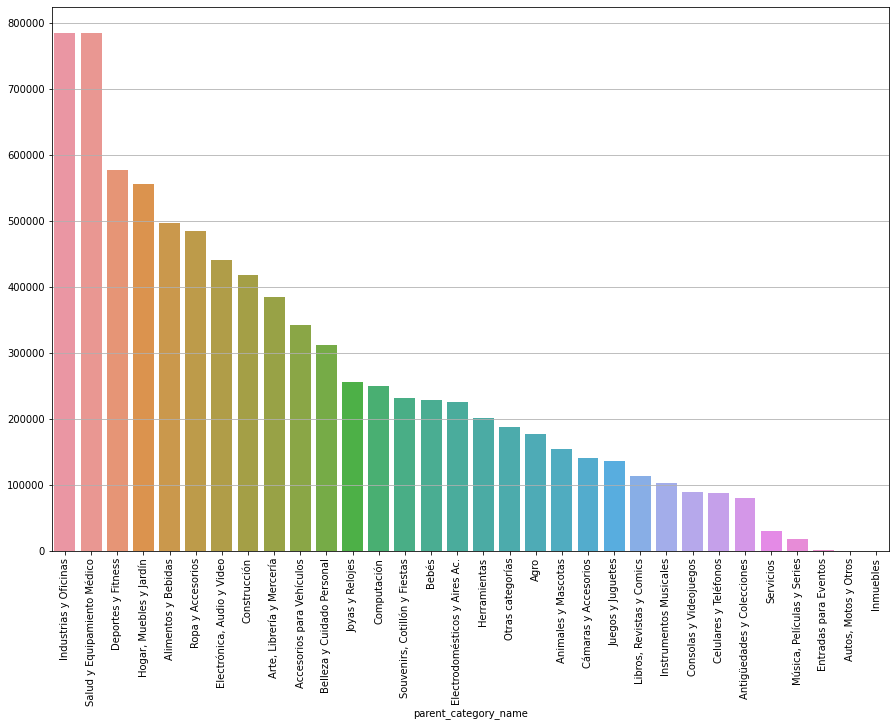

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(x=soldByCategory.index, y=soldByCategory.values)
plt.grid(axis='y')
plt.xticks(rotation='vertical')
plt.show()

From the graphic we can see that the categories with most items sold are "Industrias y Oficinas" and "Salud y Equipamiento médico" with quantities above 780000. The following categories with sold quantity between 500000 and 600000 are "Deportes y Fitness" and "Hogar, Muebles y Jardín". The categories with no item sold are "Inmuebles" and "Autos, Motos y Otros". "Entradas para Eventos" which has less than 1000 items and we can group the rest of the categories in intervals from 100k to 500k.

The categories with most sold quantities are "Industrias y Oficinas" and "Salud y Equipamiento médico" this can be explained as an effect of the pandemic we have being going through (i.e. items for home-office and health items like masks, thermometers, etc.), though a detailed explanation should be obtained analyzing data including years prior to 2020.

The categories with no items sold are "Inmuebles" and "Autos, Motos y Otros" as these items are generally expensive and the taxes to be paid also higher these sales usually do not take place within Mercado Libre.

Again for a more in depth analysis data from different years should be taken.

Let's see products with discount and save only some of the columns to process:

In [44]:
discountedProducts = productsDF[["id", "category_id", "parent_category_id", "parent_category_name", "price", "original_price", "available_quantity", "sold_quantity", "condition", "accepts_mercadopago", "installments", "differential_pricing","sale_price", "address", "seller_address", "shipping"]].loc[productsDF["original_price"].notna()]

In [45]:
discountedProducts["original_price"]=discountedProducts["original_price"].astype(float)

In [46]:
discountedProducts["discount"] = (discountedProducts["original_price"] - discountedProducts["price"]).astype(float)

In [47]:
discountedProducts.head()

,id,category_id,parent_category_id,parent_category_name,price,original_price,available_quantity,sold_quantity,condition,accepts_mercadopago,installments,differential_pricing,sale_price,address,seller_address,shipping,discount
0,MLA821869592,MLA4712,MLA5725,Accesorios para Vehículos,4968.50,5230.0,150,500,new,True,"{'quantity': 12, 'amount': 704.57, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-C', 'state_name': 'Capital Fe...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': True, 'mode': 'me2', 'tags':...",261.50
2,MLA1102761474,MLA370796,MLA5725,Accesorios para Vehículos,1999.00,2399.0,456,3877,new,True,"{'quantity': 12, 'amount': 283.47, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-B', 'state_name': 'Buenos Air...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': False, 'mode': 'me2', 'tags'...",400.00
5,MLA909004508,MLA6867,MLA5725,Accesorios para Vehículos,3470.11,3899.0,42,6056,new,True,"{'quantity': 12, 'amount': 492.09, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-C', 'state_name': 'Capital Fe...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': False, 'mode': 'me2', 'tags'...",428.89
7,MLA916001392,MLA370796,MLA5725,Accesorios para Vehículos,3298.00,3880.0,190,1401,new,True,"{'quantity': 12, 'amount': 467.68, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-C', 'state_name': 'Capital Fe...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': True, 'mode': 'me2', 'tags':...",582.00
9,MLA851344178,MLA373345,MLA5725,Accesorios para Vehículos,1115.07,1199.0,50,500,new,True,"{'quantity': 12, 'amount': 158.13, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-S', 'state_name': 'Santa Fe',...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': False, 'mode': 'me2', 'tags'...",83.93


In [48]:
discountedProducts["discountPercentage"] = (discountedProducts["discount"] / discountedProducts["original_price"]*100).astype(float)

In [49]:
discountedProducts.head()

,id,category_id,parent_category_id,parent_category_name,price,original_price,available_quantity,sold_quantity,condition,accepts_mercadopago,installments,differential_pricing,sale_price,address,seller_address,shipping,discount,discountPercentage
0,MLA821869592,MLA4712,MLA5725,Accesorios para Vehículos,4968.50,5230.0,150,500,new,True,"{'quantity': 12, 'amount': 704.57, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-C', 'state_name': 'Capital Fe...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': True, 'mode': 'me2', 'tags':...",261.50,5.000000
2,MLA1102761474,MLA370796,MLA5725,Accesorios para Vehículos,1999.00,2399.0,456,3877,new,True,"{'quantity': 12, 'amount': 283.47, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-B', 'state_name': 'Buenos Air...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': False, 'mode': 'me2', 'tags'...",400.00,16.673614
5,MLA909004508,MLA6867,MLA5725,Accesorios para Vehículos,3470.11,3899.0,42,6056,new,True,"{'quantity': 12, 'amount': 492.09, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-C', 'state_name': 'Capital Fe...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': False, 'mode': 'me2', 'tags'...",428.89,11.000000
7,MLA916001392,MLA370796,MLA5725,Accesorios para Vehículos,3298.00,3880.0,190,1401,new,True,"{'quantity': 12, 'amount': 467.68, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-C', 'state_name': 'Capital Fe...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': True, 'mode': 'me2', 'tags':...",582.00,15.000000
9,MLA851344178,MLA373345,MLA5725,Accesorios para Vehículos,1115.07,1199.0,50,500,new,True,"{'quantity': 12, 'amount': 158.13, 'rate': 70....",NaN,NaN,"{'state_id': 'AR-S', 'state_name': 'Santa Fe',...","{'id': '', 'comment': '', 'address_line': '', ...","{'free_shipping': False, 'mode': 'me2', 'tags'...",83.93,7.000000


In [50]:
discountedProducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2937 non-null   object 
 1   category_id           2937 non-null   object 
 2   parent_category_id    2937 non-null   object 
 3   parent_category_name  2937 non-null   object 
 4   price                 2937 non-null   float64
 5   original_price        2937 non-null   float64
 6   available_quantity    2937 non-null   int64  
 7   sold_quantity         2937 non-null   int64  
 8   condition             2937 non-null   object 
 9   accepts_mercadopago   2937 non-null   bool   
 10  installments          2937 non-null   object 
 11  differential_pricing  473 non-null    object 
 12  sale_price            0 non-null      float64
 13  address               2937 non-null   object 
 14  seller_address        2937 non-null   object 
 15  shipping              2

Let's see discounts by categories and add some columns with information on min, max, mean and count.

In [51]:
discountedProducts.groupby("parent_category_name").agg({'discount': ["min", "max","mean", "count"], 'discountPercentage': ["min", "max","mean"]})

discount                                 \
                                   min        max          mean count   
parent_category_name                                                    
Accesorios para Vehículos         0.00   13001.00   1299.927978    89   
Agro                              0.00   26022.22   2933.778062   129   
Alimentos y Bebidas               0.00    5200.00    420.029391   230   
Animales y Mascotas               0.00    4600.00    705.033235    34   
Antigüedades y Colecciones        0.00    1200.00    146.975294    17   
Arte, Librería y Mercería         0.00    4301.00    366.542885    52   
Bebés                             0.00   35009.00   1511.107609    92   
Belleza y Cuidado Personal        0.00   11001.00    910.672237   152   
Celulares y Teléfonos             0.00   31000.00   5073.122411   112   
Computación                       0.00   92222.00  10170.869149    94   
Consolas y Videojuegos            0.00   14000.00   1242.800250    80   
Construcción                      0.00   21001.00   2172.751038   106   
Cámaras y Accesorios              0.00  255600.00  11700.182155   116   
Deportes y Fitness                0.00   35550.00   3042.202986   144   
Electrodomésticos y Aires Ac.     0.00   97600.00   5215.956235   162   
Electrónica, Audio y Video        0.00  100900.00   4992.327044   159   
Herramientas                      0.00   24001.00   2336.579728   147   
Hogar, Muebles y Jardín           0.00  125805.67   6938.125547   128   
Industrias y Oficinas             0.00   22100.00   3179.220167   120   
Instrumentos Musicales            0.00   25552.60   3937.126818    88   
Joyas y Relojes                   0.00   14000.00   1333.642037   108   
Juegos y Juguetes                 0.00   13025.07   1262.345234   128   
Libros, Revistas y Comics        34.25    1650.00    263.516833   120   
Música, Películas y Series       96.99    2200.00    796.622500     4   
Otras categorías                 13.75    1499.75    304.634194    31   
Ropa y Accesorios                 0.00    8040.00   1400.437850   107   
Salud y Equipamiento Médico       0.00   27001.00   2562.546746   169   
Souvenirs, Cotillón y Fiestas     0.00    1225.00    214.415789    19   

                              discountPercentage                        
                                             min        max       mean  
parent_category_name                                                    
Accesorios para Vehículos                    0.0  65.656250  15.529825  
Agro                                         0.0  70.500000  16.100330  
Alimentos y Bebidas                          0.0  50.251256  17.361426  
Animales y Mascotas                          0.0  35.117185  11.081398  
Antigüedades y Colecciones                   0.0  20.003334   5.706078  
Arte, Librería y Mercería                    0.0  63.654545  11.280086  
Bebés                                        0.0  50.000000  18.458803  
Belleza y Cuidado Personal                   0.0  68.756250  21.181470  
Celulares y Teléfonos                        0.0  32.783792   6.247780  
Computación                                  0.0  62.885714  14.803308  
Consolas y Videojuegos                       0.0  62.244444  16.104004  
Construcción                                 0.0  68.756250  22.226970  
Cámaras y Accesorios                         0.0  65.050000  22.119208  
Deportes y Fitness                           0.0  75.012500  18.542075  
Electrodomésticos y Aires Ac.                0.0  68.020000  15.244144  
Electrónica, Audio y Video                   0.0  69.608696  14.404514  
Herramientas                                 0.0  70.500000  17.746033  
Hogar, Muebles y Jardín                      0.0  72.745455  21.993694  
Industrias y Oficinas                        0.0  70.100000  19.433642  
Instrumentos Musicales                       0.0  70.012500  17.347576  
Joyas y Relojes                              0.0  70.040000  14.640755  
Juegos y Jugue

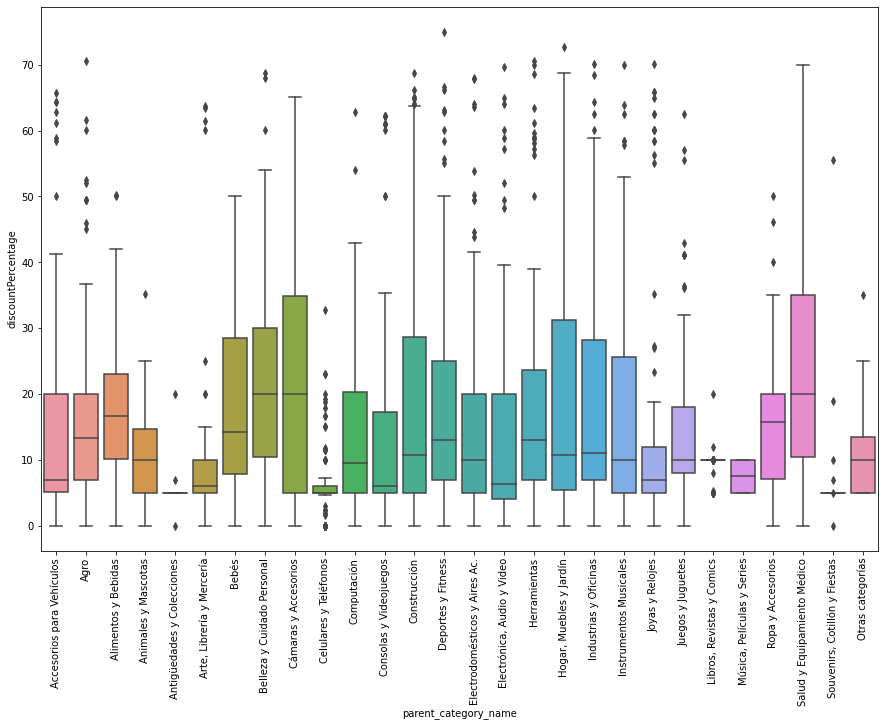

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(data = discountedProducts, x="parent_category_name", y="discountPercentage")
plt.xticks(rotation='vertical')
plt.show()

We can see from the data table and the box plot that mean and median values for discount percentage range from 5 to 22%. 

The category with more items with discount is "Alimentos y Bebidas" with 230 items in discount, a maximum of 50% of discount and 17% mean discount. Followed by "Salud y Equipamiento Médico" with 169 items with discount, a maximum discount of 70% and mean %23, "Electrodomésticos y Aires Ac." with 162 items, max 68% and mean 15% and "Electrónica, Audio y Video" with 159 items, max 69% and mean 14.40%. These categories are included in the range above 200000 items sold.

There are some items in the categories "Agro", "Deportes y Fitness", "Herramientas" "Hogar, Muebles y Jardín", "Industrias y Oficinas", "Instrumentos Musicales", "Joyas y Relojes" and "Salud y Equipamiento Médico" with discounts that exceed 70% which is rather curious. I would like to know the availability of these items and state.

In [73]:
maxDiscount= discountedProducts.loc[discountedProducts.discountPercentage>70]

In [82]:
productsDF[["title","price","available_quantity", "sold_quantity", "condition", "parent_category_name"]].loc[productsDF["id"].isin(maxDiscount["id"])]

,title,price,available_quantity,sold_quantity,condition,parent_category_name
40,Termometro Higrometro Digital Humedad Temperat...,649.0,250,5000,new,Agro
48,Linterna Minero Led Cabeza Vincha 5 Leds Bateria,1999.0,500,5000,new,Deportes y Fitness
41,Kit Juego Destornilladores 8 Piezas Phillips P...,1499.0,250,500,new,Herramientas
7,Termometro Higrometro Digital Humedad Temperat...,649.0,250,5000,new,Herramientas
0,Luz De Emergencia Slt 30 Leds Slt 15 Hs Autonomía,1499.0,500,5000,new,"Hogar, Muebles y Jardín"
7,Kit Mercado Pago Point Mini + Qr,299.0,500,5000,new,Industrias y Oficinas
25,Ukelele Soprano De Madera Cuerdas Naylon Pua +...,2399.0,50,500,new,Instrumentos Musicales
17,Reloj Despertador Luz Led Rgb Pantalla Alarma ...,749.0,250,500,new,Joyas y Relojes
18,Masajeador Electrico Cervical Hombros Pies Shi...,4199.0,500,500,new,Salud y Equipamiento Médico
